In [4]:
import os
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [5]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    top, right, bottom, left = face_recognition.face_locations(image)[0]
    cropped_face = image[top:bottom, left:right]
    return cropped_face

In [6]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        if (file == '.ipynb_checkpoints'):
            continue
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:   
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [8]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [9]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [64]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return [sorted_faces[0][0], sorted_faces[1][0], sorted_faces[2][0], sorted_faces[3][0], sorted_faces[4][0], sorted_faces[5][0]]

In [11]:
dir_path = os.getenv('HOME')+'/aiffel/Exploration/5/images'
file_list = os.listdir(dir_path)

In [12]:
embedding_dict = get_face_embedding_dict(dir_path)

In [65]:
# 가장 비슷한 사진 순으로 나열, 가장 비슷한 사람 저장
most_same_images = get_nearest_face('나')

순위 1 : 이름(나2), 거리(0.37797967931972365)
순위 2 : 이름(김현수), 거리(0.42591119451905507)
순위 3 : 이름(기성용), 거리(0.44282249675049157)
순위 4 : 이름(김래원), 거리(0.4653762389879213)
순위 5 : 이름(박재범), 거리(0.47197373195887043)


In [66]:
print(most_same_images)

['나', '나2', '김현수', '기성용', '김래원', '박재범']


## 시각화
원본 이미지와 임베딩 거리가 작은 다섯 개의 이미지들을 출력하도록 한다.
이때 오른쪽으로 갈수록 임베딩 거리가 멀어지는 것을 표현하기 위해 사진이 점점 어두워지게 설정하였다.

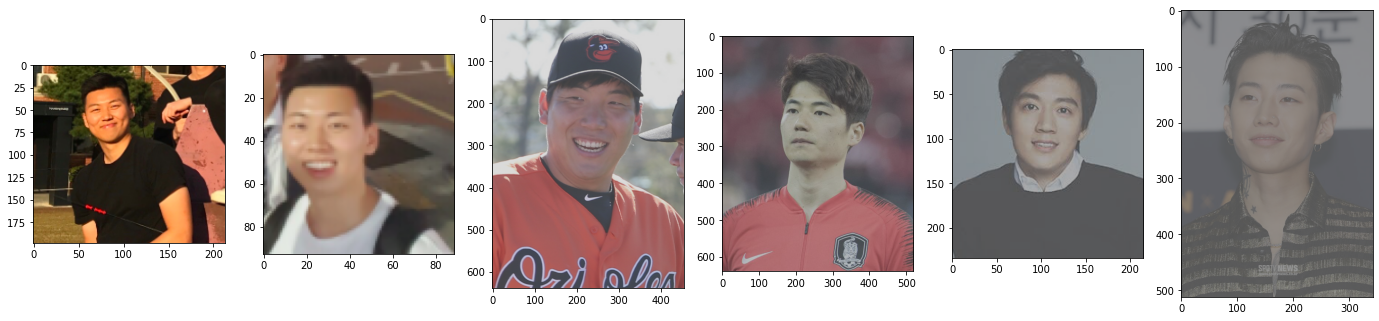

In [110]:
from PIL import ImageEnhance
from PIL import Image

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
    image = Image.open(dir_path+'/' + most_same_images[i] + '.jpg')
    enhancer = ImageEnhance.Contrast(image)
    new_image = enhancer.enhance((1 - 0.15*i))
    ax.imshow(new_image)

plt.show()
fig.tight_layout()

## 회고
이번 프로젝트에서 어려웠던 점
- 시각화 툴에 익숙하지 않아서 마지막 시각화 처리 부분에서 어떤 방식으로 할지 계획하기가 쉽지 않았고, 간단한 코드였지만 계획한 방식을 코드로 옮기는데 많은 시간이 걸렸다.

프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
- Matplotlib나 PIL의 기능들에 대해 정확히 익히지 못했다.

자기 다짐
- 인공지능 분야는 결과를 보여주기 위해 시각화 처리를 많이 사용하므로 좀 더 익혀야겠다.